<a href="https://colab.research.google.com/github/hargurjeet/Adhoc-Activities/blob/main/titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lib Imports

In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder

In [42]:
## acessing the dataset
titanic_df = pd.read_csv('train.csv')
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [43]:
titanic_df.shape

(891, 12)

In [44]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [45]:
titanic_df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [46]:
titanic_df.isnull().sum()/titanic_df.shape[0]

,0
PassengerId,0.000000
Survived,0.000000
Pclass,0.000000
Name,0.000000
Sex,0.000000
Age,0.198653
SibSp,0.000000
Parch,0.000000
Ticket,0.000000
Fare,0.000000


In [47]:
titanic_df.drop(labels=['PassengerId', 'Ticket'], axis =1, inplace=True)
titanic_df

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...
886,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,13.0000,NaN,S
887,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,30.0000,B42,S
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,23.4500,NaN,S
889,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,30.0000,C148,C


In [48]:
titanic_df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# EDA

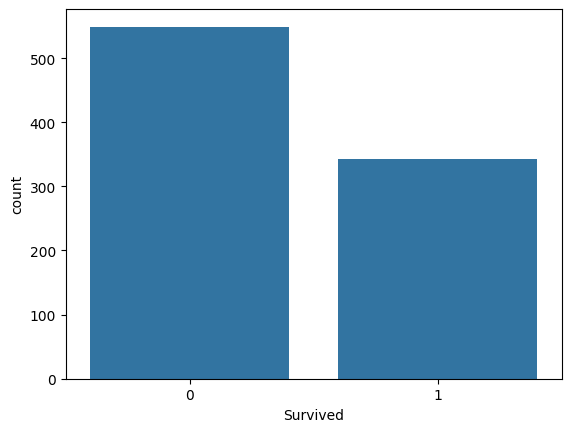

In [49]:
sns.countplot(titanic_df, x= titanic_df.Survived) ;

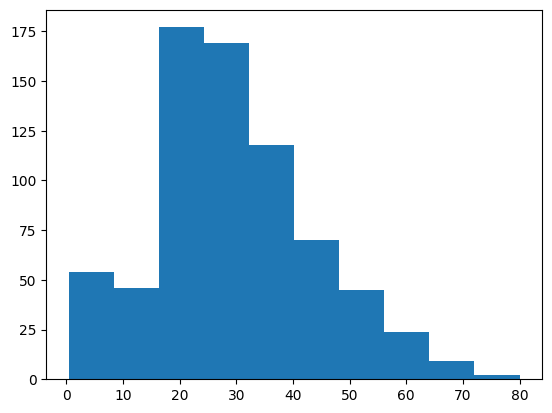

In [50]:
plt.hist(titanic_df['Age'], bins=10);

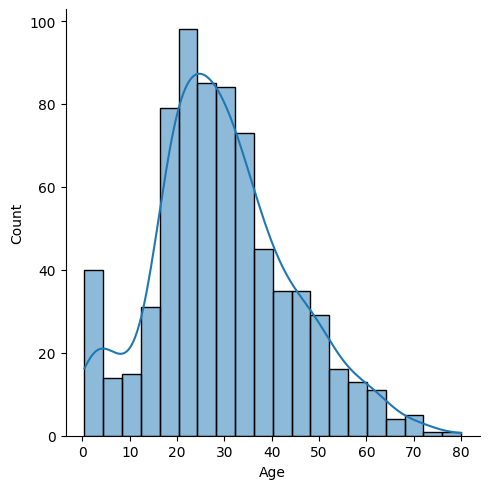

In [51]:
sns.displot(titanic_df['Age'], kde=True);

<Axes: xlabel='Pclass', ylabel='Fare'>

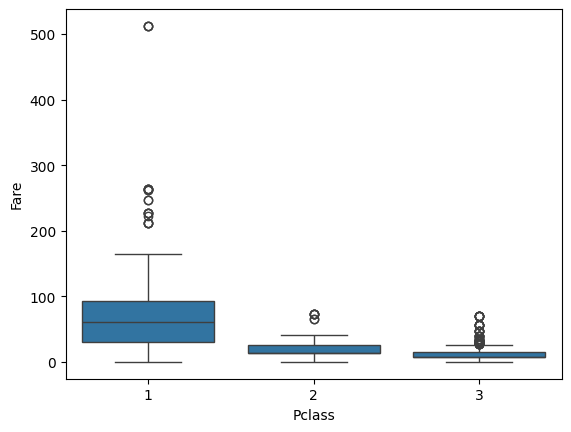

In [52]:
sns.boxplot(x=titanic_df['Pclass'], y=titanic_df['Fare'])

In [53]:
titanic_df.Cabin.value_counts()

,count
Cabin,
B96 B98,4
G6,4
C23 C25 C27,4
C22 C26,3
F33,3
...,...
E34,1
C7,1
C54,1


# Preprocessing

## Imputing and standarizing data

In [14]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Fare      891 non-null    float64
 8   Cabin     204 non-null    object 
 9   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(4)
memory usage: 69.7+ KB


In [55]:
X = titanic_df.drop(columns=['Survived', 'Name'], axis = 1)
y = titanic_df['Survived']

In [56]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [57]:
## segrgating numberical and catergoical columns

numberical_cols = [col for col in X_train.columns if X_train[col].dtype != 'O']
categorical_cols = [col for col in X_train.columns if X_train[col].dtype == 'O']
# categorical_cols = ['Sex', 'Cabin', 'Embarked']

print('numberical_cols : ', numberical_cols)
print('categorical_cols : ', categorical_cols)

numberical_cols :  ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']
categorical_cols :  ['Sex', 'Cabin', 'Embarked']


In [59]:
## Imputing and scaling numberical columns
scaler = StandardScaler()

imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
X_train[numberical_cols] = imp_mean.fit_transform(X_train[numberical_cols])
X_train[numberical_cols] = scaler.fit_transform(X_train[numberical_cols])

X_test[numberical_cols] = imp_mean.transform(X_test[numberical_cols])
X_test[numberical_cols] = scaler.transform(X_test[numberical_cols])

In [ ]:
imp_freq = SimpleImputer(missing_values=np.nan, strategy='most_frequent')

X_train[categorical_cols] = imp_freq.fit_transform(X_train[categorical_cols])
X_test[categorical_cols] = imp_freq.transform(X_test[categorical_cols])
X_test[categorical_cols].head()

In [77]:
## Implementing one hot encodring
ohe = OneHotEncoder(handle_unknown='ignore')
encoded_array = ohe.fit_transform(X_train[categorical_cols])
X_train_encoded_df = pd.DataFrame(encoded_array.toarray(), columns=ohe.get_feature_names_out(categorical_cols))

encoded_array = ohe.transform(X_test[categorical_cols])
X_test_encoded_df = pd.DataFrame(encoded_array.toarray(), columns=ohe.get_feature_names_out(categorical_cols))

In [79]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 596 entries, 6 to 102
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    596 non-null    float64
 1   Sex       596 non-null    object 
 2   Age       596 non-null    float64
 3   SibSp     596 non-null    float64
 4   Parch     596 non-null    float64
 5   Fare      596 non-null    float64
 6   Cabin     596 non-null    object 
 7   Embarked  596 non-null    object 
dtypes: float64(5), object(3)
memory usage: 41.9+ KB


In [81]:
X_train_final = pd.concat([X_train, X_train_encoded_df], axis=1)
X_train_final.drop(columns=categorical_cols, axis=1, inplace=True)
X_train_final.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Cabin_A10,Cabin_A14,Cabin_A16,...,Cabin_F G73,Cabin_F2,Cabin_F33,Cabin_F38,Cabin_F4,Cabin_G6,Cabin_T,Embarked_C,Embarked_Q,Embarked_S
6,-1.625803,1.892247e+00,-0.469837,-0.463993,0.387842,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
718,0.805762,5.614788e-17,-0.469837,-0.463993,-0.319081,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
685,-0.410021,-3.499336e-01,0.344183,2.016183,0.187924,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
73,0.805762,-2.726170e-01,0.344183,-0.463993,-0.339412,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
882,0.805762,-5.818833e-01,-0.469837,-0.463993,-0.415961,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Training ml models

In [40]:
titanic_df.shape

(891, 10)

In [64]:
X_train.shape


(596, 8)

In [65]:
X_test.shape

(295, 8)

### Training Logixtic regression

In [66]:
clf = LogisticRegression(random_state=0).fit(X_train, y_train)
clf.predict(X_train)

ValueError: could not convert string to float: 'male'